<a href="https://colab.research.google.com/github/IshaanMaheshwari22/TCS-iON-Forecasting-Retail-Demand/blob/main/EDA_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')
from pandas_profiling import ProfileReport
%matplotlib inline

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/TCS-ION- internship /Superstore_Dataset.xlsm')
print(df.head())
print(df.tail())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2     3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3     4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10

In [5]:
df.shape

(9994, 21)

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df1 = df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID'], axis = 1) #Dropping columns

df1.head()

,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [9]:
df1.isnull().sum()  #Checking for null values

Order Date       0
Ship Date        0
Ship Mode        0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [24]:
def city_profit(category):
    category_1 = df[df['Category'] == category]
    category_1.groupby('City')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='bar',title="Top 5 Cities that made the most profit in {}".format(category))

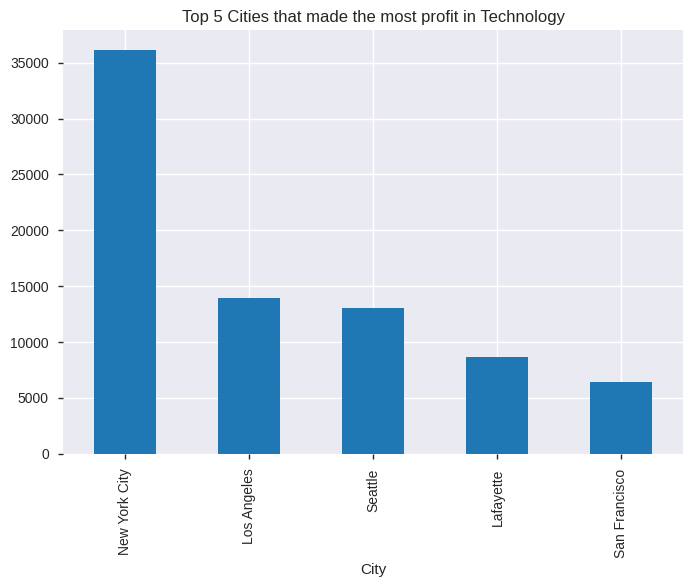

In [19]:
city_profit('Technology')

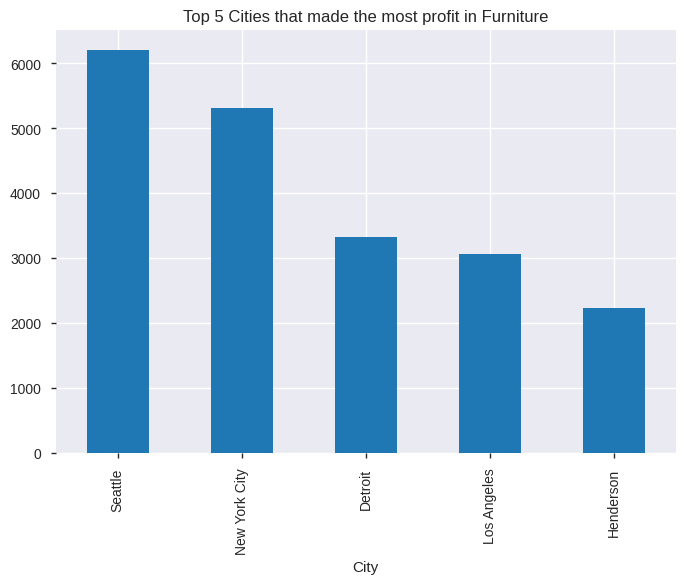

In [25]:
city_profit('Furniture')

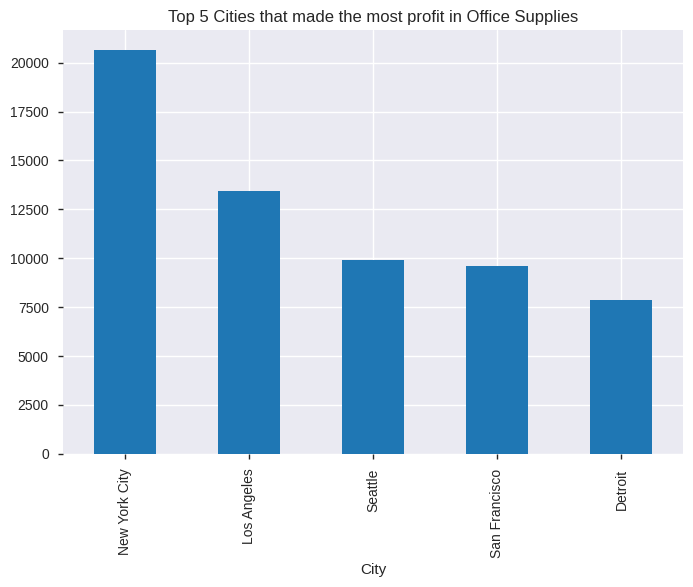

In [26]:
city_profit('Office Supplies')

Text(0.5, 1.0, 'Sub-Category Count')

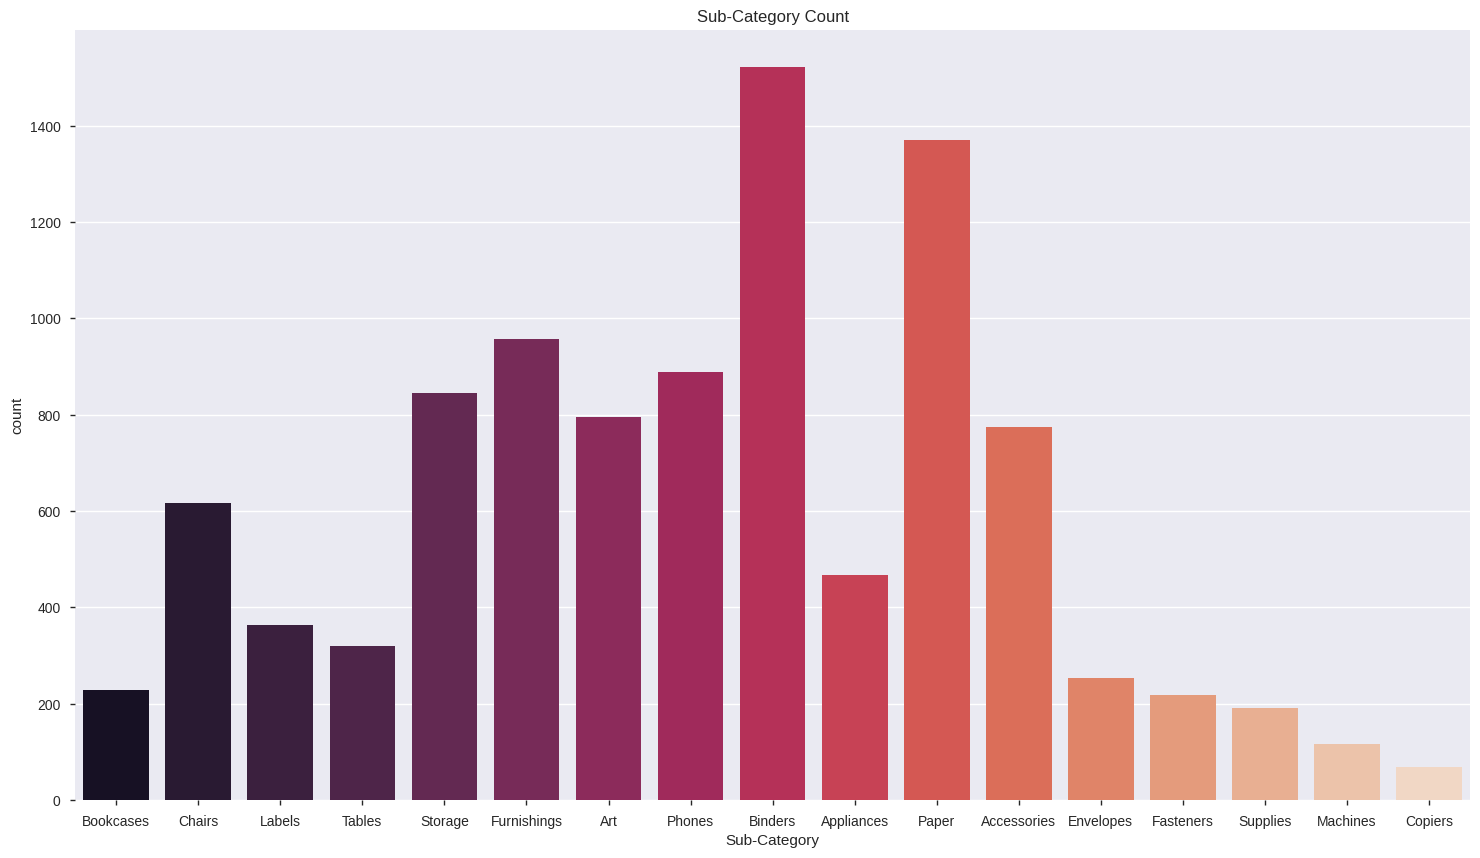

In [44]:
#Plotting all subcategry
plt.figure(figsize=(18,10))
sns.countplot(x=df['Sub-Category'],palette='rocket')
plt.title("Sub-Category Count")

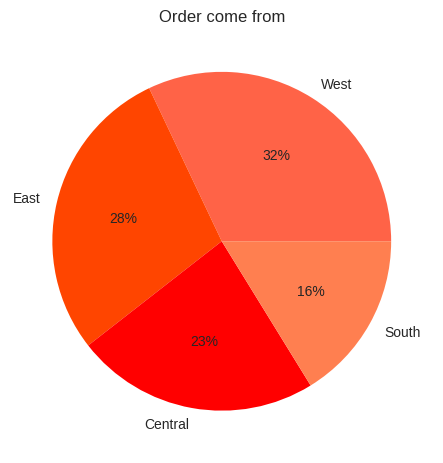

In [38]:
#Region wise Sales/Orders 
colors = ('tomato','orangered','red','coral')
plt.pie(df1['Region'].value_counts().values, labels = df1['Region'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("Order come from")
plt.show()

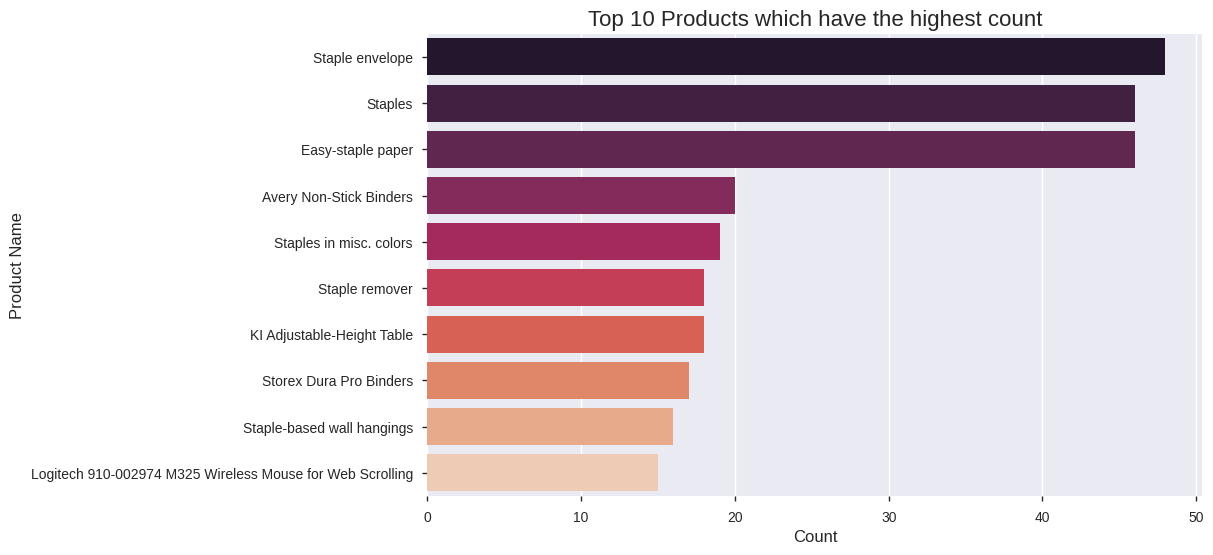

In [40]:
# check top 10 products which have the highest sales

plt.figure(figsize=(10, 6))
sns.countplot(y='Product Name', data=df, order=df['Product Name'].value_counts().head(10).index, palette='rocket')
plt.title('Top 10 Products which have the highest count', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

plt.show()